<a href="https://colab.research.google.com/github/handielg/Python/blob/main/NLP_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta semana aprenderás cómo implementar modelos de secuencia, en TensorFlow, y si has oído hablar de modelos como RNN o Red Neural Recurrent, esta semana te enseñaremos cómo implementarlo. Es importante tomar palabras y calcular incrustaciones para ellas, pero el orden relativo, la secuencia de palabras también importa para el significado de una oración, y si se mezclan las palabras, eso cambia o destruye el significado de una oración.

La semana pasada, analizamos hacer la clasificación usando textos y tratando de entrenar y entender el sentimiento positivo y negativo en las críticas de películas. Terminamos mirando el efecto de tokenizar palabras, y vimos que nuestro clasificador no pudo obtener ningún resultado significativo. La razón principal de esto fue que el contexto de las palabras era difícil de seguir cuando las palabras se dividieron en sub-palabras y la secuencia en la que aparecen los tokens para las sub-palabras se vuelve muy importante para entender su significado. Echemos un vistazo a eso ahora.

Cuando estábamos haciendo clasificación basada en incrustaciones la semana pasada, fue muy bueno que tuviéramos palabras con significados similares, etiquetas de una manera particular, para que pudiéramos decir bien, esta es una crítica positiva, y obtuve un montón de vectores que son similares, esta es una crítica negativa, y yo obtuvieron estos vectores de una manera similar, pero ordenarlos nos da toda esa capa adicional de significado que nos ayudará a entender la frase en lugar de simplemente una clasificación simple. Así que para una red neuronal, para tener en cuenta el orden de las palabras, la gente ahora usa Arquitecturas de Red Neural especializadas, cosas como un RNN, o GIO, o LSTM, y ves lo que todos estos términos significan, y un poco, para que estas Redes Neuronales Especializadas proceso de lenguaje natural. Sí. Entonces, como algo así como un RNN, es realmente interesante que, el contexto se conserve de marca de tiempo a marca de tiempo, lo que puede ser realmente útil, pero eso podría perderse en oraciones más largas, y es por eso que realmente me encantan los LSTM porque los LSTM tienen ese estado de celda, y el estado de la celda son casi como una cinta transportadora que lleva contextos todo el camino hacia abajo, para un largo camino hacia abajo marca de tiempo. Me encanta que usted tiene un sabor favorito en cómo seguir la secuencia.

[Curso RNN](https://www.coursera.org/lecture/nlp-sequence-models/long-short-term-memory-lstm-KXoay)

#**Single Layer LSTM**

##Clase 1a

Puede que en una oración se mencione un país, y al final de esta el idioma que se habla en este, por lo que hay una relación entre estas palabras.

Teniendo esto presente una actualización de RNN se denomina LSTM, se ha creado una memoria a largo plazo a corto plazo. Además del contexto que se está paased tal como está en RNN, los LSTM tienen una canalización adicional de contextos llamados estado de celda. Esto puede pasar a través de la red para impactarla. Esto ayuda a mantener el contexto de la relevancia de los tokens anteriores en los posteriores para que se puedan evitar problemas como el que acabamos de discutir. Los estados de celda también pueden ser bidireccionales. Por lo tanto, los contextos posteriores pueden afectar a los anteriores como veremos cuando veamos el código. 

[Video LSTM](https://www.coursera.org/lecture/nlp-sequence-models/long-short-term-memory-lstm-KXoay)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #de esta forma implementamos LSTM en el código. Esta segunda capa es LSTM. 64 es el número de salidas que deseo de esa capa.
    #Al envolver la capa LSTM con tf.keras.layers.bidireccional, hará que mi estado celular vaya en ambas direcciones. Verá esto cuando explore el resumen del modelo, que tiene este aspecto.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Veamos el impacto de usar un LSTM en el modelo que vimos en el último módulo, donde teníamos tokens de subpalabra.

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

##Clase 1b

#**Multiple Layer LSTM**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

#**Resumen**

Aquí está la comparación de las precisiones entre el LSTM de una capa y la de dos capas una en 10 épocas. No hay mucha diferencia excepto la precisión de la nariz y la validación. Pero observe cómo la curva de entrenamiento es más suave. Descubrí por las redes de entrenamiento que la irregularidad puede ser una indicación de que su modelo necesita mejora, y el único LSTM que puede ver aquí no es el más suave. Si nos fijamos en la pérdida, en las primeras 10 épocas, podemos ver resultados similares. 

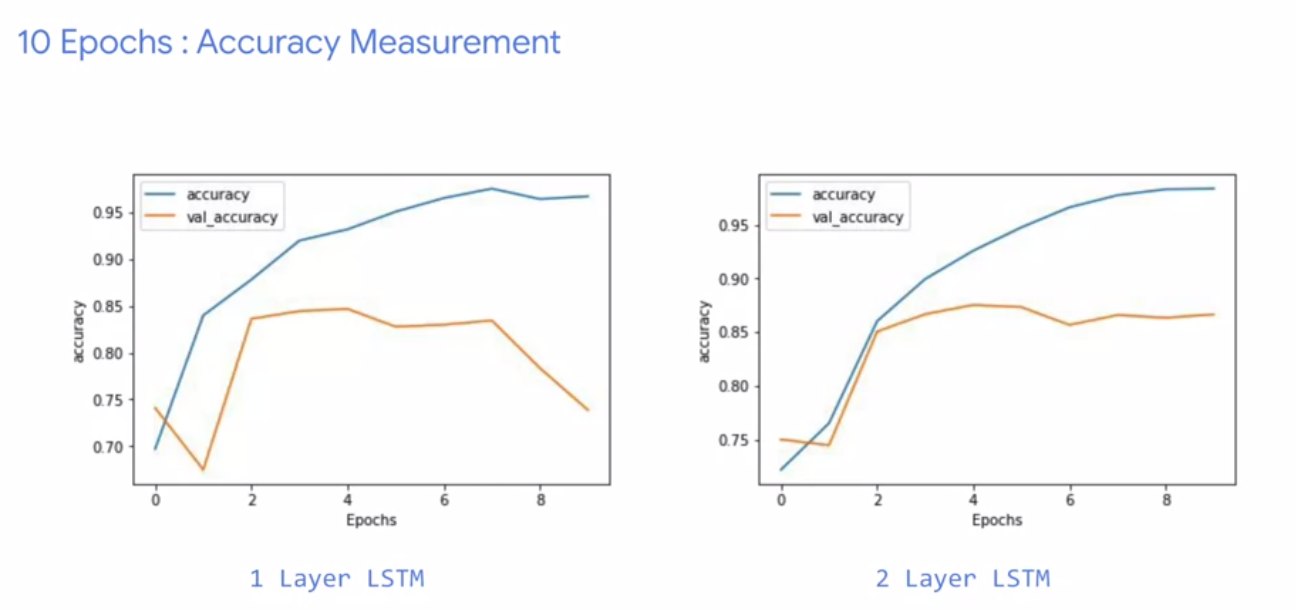

Pero mira lo que sucede cuando aumentamos a 50 épocas de entrenamiento. Nuestro LSTM de una capa, mientras sube con precisión, también es propenso a algunas salsas bastante agudas. El resultado final podría ser bueno, pero esas caídas me hacen sospechar sobre la precisión general del modelo. Nuestras dos capas uno se ve mucho más suave, y como tal me hace mucho más seguro en sus resultados. Tenga en cuenta también la precisión de la validación. Teniendo en cuenta que los niveles se sitúan en alrededor del 80 por ciento, no está mal dado que el conjunto de entrenamiento y el conjunto de pruebas fueron 25.000 revisiones. Pero estamos usando 8.000 sub-palabras tomadas sólo del conjunto de entrenamiento. Así que habría muchos tokens en los conjuntos de pruebas que estarían fuera de vocabulario. Sin embargo, a pesar de eso, todavía estamos en cerca del 80 por ciento de precisión. 

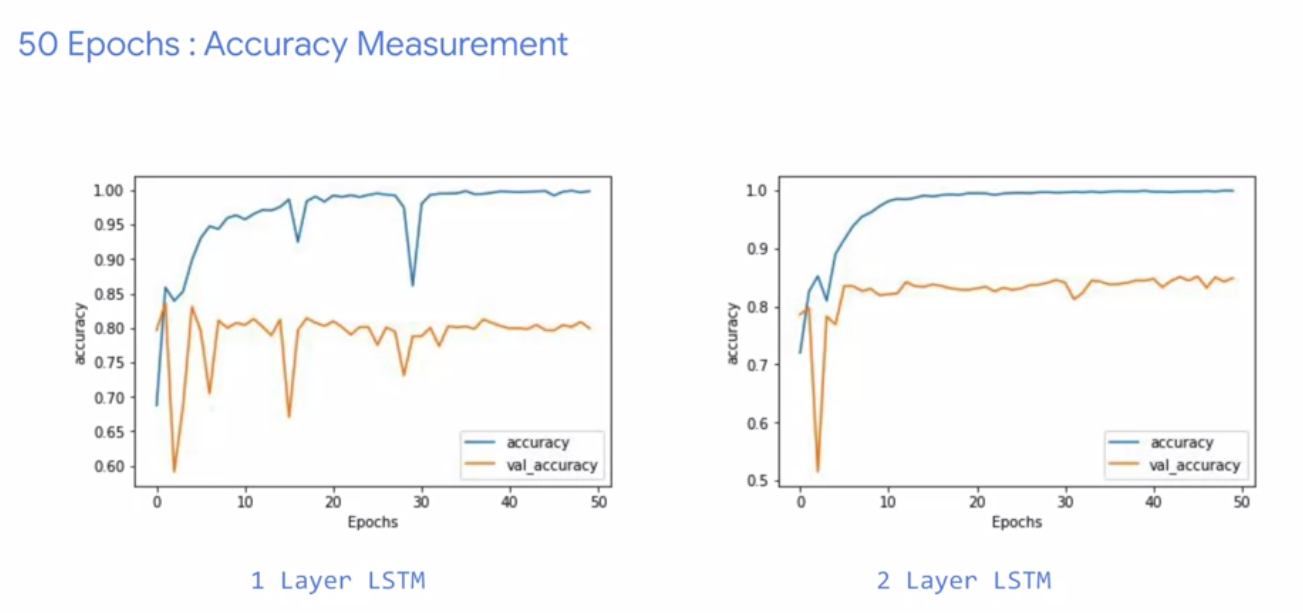

Nuestros resultados de pérdida son similares con las dos capas que tienen una curva mucho más suave. La pérdida está aumentando época por época. Así que vale la pena monitorear para ver si se aplana en épocas posteriores como se desearía. Espero que haya sido una buena introducción sobre cómo los RNN y los LSTM pueden ayudarle con la clasificación de texto. Su secuenciación inherente es ideal para predecir texto invisible si desea generar algunos, y veremos que la próxima semana. 

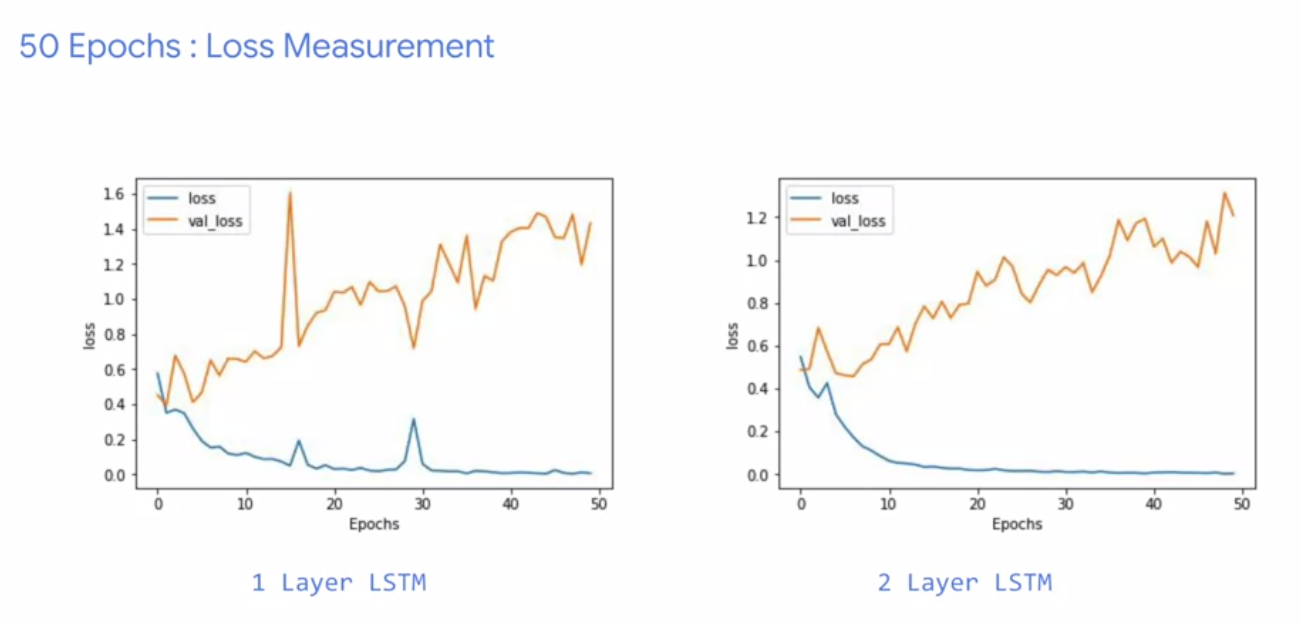

##Clase 1c

Otros tipos de RNN

#**Multiple Layer GRU**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Empecemos con esta red neuronal básica. Tiene una incrustación que toma mi tamaño de vocabulario, dimensiones de incrustación y longitud de entrada como de costumbre. La salida de la incrustación se aplana, promedió y luego se alimenta a una red neuronal densa. Pero podemos experimentar con las capas que unen la incrustación y la densa eliminando el aplanamiento y pulsando desde aquí, y reemplazándolas con un LSTM como la anterios. Para un aprendiz que usa el conjunto de datos de sarcasmo con estos, cuando solo uso la agrupación y el aplanamiento, rápidamente obtuve cerca del 85% de precisión y luego se aplanó. El conjunto de validación era un poco menos preciso, pero las curvas estamos bastante sincronizados. Por otro lado, al usar LSTM, alcancé una precisión del 85 por ciento muy rápidamente y continué subiendo hacia un 97,5 por ciento de precisión dentro de 50 épocas. El conjunto de validación cayó lentamente, pero todavía estaba cerca del mismo valor que la versión no LSTM. Aún así, la caída indica que hay algo de sobreajuste pasando aquí. Así que un poco de ajuste al LSTM debería ayudar a solucionarlo. Del mismo modo, los valores de pérdida de mi no LSTM uno llegaron a estado saludable con bastante rapidez y luego aplanado. Mientras que con el LSTM, la pérdida de entrenamiento disminuye muy bien, pero la validación aumentó a medida que continúo entrenando. Una vez más, esto muestra algunos ajustes excesivos en la red LSTM. Mientras que la precisión de la predicción aumentó, la confianza en ella disminuyó. Por lo tanto, debe tener cuidado de ajustar sus parámetros de entrenamiento cuando use diferentes tipos de red, no es solo una entrega directa como lo hice aquí.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

#Clase 2

Aquí probamos con LSTM.

In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), #capa LSTM
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5") #salvamos el modelo.

#Clase 2c

Usamos una red neuronal convolucional ahora.

Si entrenamos con las circunvoluciones ahora, veremos que nuestra precisión funciona incluso mejor que antes con cerca del 100% en entrenamiento y alrededor del 80% en validación. Pero como antes, nuestra pérdida aumenta en el conjunto de validación, lo que indica un posible sobrellenado. Como tengo una red súper simple aquí, no es sorprendente, y tomará algo de experimentación con diferentes combinaciones de capas conversacionales para mejorar esto. Si volvemos al modelo y exploramos los parámetros, veremos que tenemos 128 filtros cada uno para 5 palabras. Y una exploración del modelo mostrará estas dimensiones. Como el tamaño de la entrada fue de 120 palabras, y un filtro que es de 5 palabras de largo afeitará 2 palabras de la parte delantera y trasera, dejándonos con 116. Los 128 filtros que especificamos aparecerán aquí como parte de la capa convolucional.

In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'), #Otro tipo de capa que puedes usar es una convolución, de una manera muy similar a la que hiciste con las imágenes. 
    tf.keras.layers.GlobalMaxPooling1D(), #parte de la convolución.
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'], verbose = 0)
model.summary()

num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

--2020-12-22 12:29:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-12-22 12:29:15 (228 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_______________________________________________________

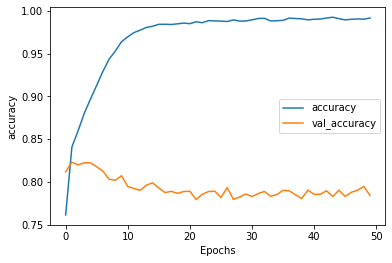

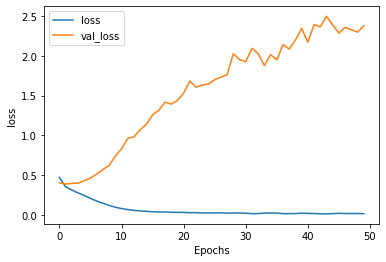

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5")

#Clase 2d

Así que ahora que hemos visto estos, volvamos al conjunto de datos IMDB que usamos anteriormente en este curso. Aquí, voy a usar una incrustación que aplané antes de que entre en la densa. Mi modelo se verá así, con unos 171,533 parámetros, y el rendimiento será así. Es una buena precisión, pero claro sobreajuste, pero solo toma unos cinco segundos por época para entrenar. Si cambio esto para usar un LSTM, ahora tendré solo 30.129 parámetros, pero tomará unos 43 segundos por época. La precisión es mejor, pero todavía hay algo de sobreajuste. Si pruebo una capa GRU en su lugar, con un GRU siendo un tipo diferente de RNN, y lo hago bidireccional, mi red tendrá unos parámetros de 169,997. Mi tiempo de entrenamiento caerá a 20 segundos por época, y mi precisión es otra vez muy buena en el entrenamiento, y no muy mal en la validación, pero de nuevo, mostrando algo de sobreajuste. Con una red convolucional, tendré unos 171.149 parámetros y solo toma unos seis segundos por época para acercarme al 100% de precisión en el entrenamiento, y alrededor del 83 por ciento en la validación, pero de nuevo con sobreajuste.

In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

#**Ejercicio**

Ejercicio 3- Explorar el sobreajuste en la PNL
Al examinar una serie de tipos diferentes de capa para la clasificación de texto esta semana, vio muchos ejemplos de sobreajuste, con una de las principales razones del sobreajuste de que el conjunto de datos de entrenamiento era bastante pequeño y con un pequeño número de palabras. Las incrustaciones derivadas de esto también pueden ser generalizadas. Así que para el ejercicio de esta semana vas a entrenar en un gran conjunto de datos, así como el uso del aprendizaje de transferencia de un conjunto existente de incrustaciones.

El conjunto de datos es de: https://www.kaggle.com/kazanova/sentiment140. Lo he limpiado un poco, en particular para que la codificación de archivos funcione con el lector CSV de Python. 

Las incrustaciones de las que transferirá aprenden se denominan GloVe, también conocida como Vectores Globales para Representación de Palabras, disponibles en: https://nlp.stanford.edu/projects/glove/



In [ ]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1

corpus = []

In [ ]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
        list_item=[]
        # YOUR CODE HERE
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [ ]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

In [ ]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(# YOUR CODE HERE)
    labels.append(# YOUR CODE HERE)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(# YOUR CODE HERE)

word_index = tokenizer.word_index
vocab_size=len(# YOUR CODE HERE)

sequences = tokenizer.texts_to_sequences(# YOUR CODE HERE)
padded = pad_sequences(# YOUR CODE HERE)

split = int(test_portion * training_size)

test_sequences = padded[# YOUR CODE HERE]
training_sequences = padded[# YOUR CODE HERE]
test_labels = labels[# YOUR CODE HERE]
training_labels = labels[# YOUR CODE HERE]

In [ ]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

In [ ]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
print(len(embeddings_matrix))
# Expected Output
# 138859

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
])
model.compile(# YOUR CODE HERE)
model.summary()

num_epochs = 50
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

#**Respuesta del ejercicio**

In [ ]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

corpus = []

In [ ]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [ ]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

In [ ]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [ ]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

In [ ]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
print(len(embeddings_matrix))
# Expected Output
# 138859

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

print("Training Complete")

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!